# Data Processing Approach for Portfolio Project

## Project Title: Heart-Disease-Finding

## Student Name: Davy Mbuto Nkurunziza

---

1. **Data Sources and Aggregation:**
   - List all sources of data for the project. **You must consider sources outside kaggle, google datasets** (insert links where necessary to online platforms,research papers etc)

   **

*   National Health Interview Survey (NHIS) and Behavioral Risk Factor Surveillance System (BRFSS): These surveys collect data on a wide range of health topics, including cardiovascular disease surveillance. The NHIS has been monitoring the nation's health since 1957, and BRFSS is a continuous, state-based surveillance system collecting data on modifiable risk factors for chronic diseases.

* National Health and Nutrition Examination Survey (NHANES): NHANES is a program of studies assessing the health and nutritional status of the US population. It includes data relevant to cardiovascular disease from 1999-2000 to 2017-2018.
* National Vital Statistics System (NVSS): NVSS collects and disseminates the nation's official vital statistics, including mortality data compiled from death certificates. This data is crucial for assessing the impact of cardiovascular diseases and stroke.
* Centers for Disease Control and Prevention (CDC) Interactive Heart Disease and Stroke Atlas: This resource uses data from the National Vital Statistics System, Centers for Medicare and Medicaid Services, and other sources to provide maps and data on heart disease and stroke. It includes mortality, hospitalization, and other relevant health indicators 4.
* American Heart Association Heart and Stroke Statistics: The Heart Disease and Stroke Statistical Update provides comprehensive data on cardiovascular health and disease, including prevalence, mortality, and trends. The 2024 update includes At-a-Glance and Fact Sheets, as well as detailed statistical data 2.List item.

Links to data sets : ( [1](https://catalog.data.gov/dataset/?tags=cardiovascular-disease), [2](https://www.heart.org/en/about-us/heart-and-stroke-association-statistics), [3](https://allofus.nih.gov/news-events/announcements/all-us-dataset-positioned-advance-heart-disease-research), [4](https://catalog.data.gov/dataset/?tags=heart-disease))


   
   - Determine if data aggregation from multiple sources is necessary for comprehensive analysis.

### Current Data Assessment:

We have 920 records in your heart health dataset
For machine learning models in healthcare, especially for heart disease prediction, this is a relatively small dataset
Recommendations for Data Aggregation:

* Dataset Size Requirements:

For robust machine learning models in healthcare, we typically aim for several thousand records
* Complex patterns in heart disease require larger datasets to capture various combinations of risk factors
### Statistical Significance:

With 920 records, we might face challenges with:
* Model validation
* Handling class imbalance
* Capturing rare but important medical conditions
### Model Performance:

Larger datasets through aggregation would help:
Reduce overfitting
Improve generalization
Enable more complex model architectures*



In [3]:
import pandas as pd

# Read the heart dataset
df = pd.read_csv('./heart.csv')
print("First few rows of the heart dataset:")
print(df.head())
print("\
Basic information about the dataset:")
print(df.info())

First few rows of the heart dataset:
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  

In [4]:
#Necessary imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.compose import ColumnTransformer
import pickle
import os

evaluating the completeness and scope of the current dataset.

## Data Encoding

In [5]:
df = pd.read_csv('heart.csv')
encoder = LabelEncoder()

df['sex'] = encoder.fit_transform(df['sex'])
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))
df['cp'] = encoder.fit_transform(df['cp'])
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))
df['fbs'] = encoder.fit_transform(df['fbs'])
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))
df['restecg'] = encoder.fit_transform(df['restecg'])
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))
df['exang'] = encoder.fit_transform(df['exang'])
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))
df['slope'] = encoder.fit_transform(df['slope'])
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))
df['thal'] = encoder.fit_transform(df['thal'])
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))

{'Female': 0, 'Male': 1}
{'asymptomatic': 0, 'atypical angina': 1, 'non-anginal': 2, 'typical angina': 3}
{False: 0, True: 1, nan: 2}
{'lv hypertrophy': 0, 'normal': 1, 'st-t abnormality': 2, nan: 3}
{False: 0, True: 1, nan: 2}
{'downsloping': 0, 'flat': 1, 'upsloping': 2, nan: 3}
{'fixed defect': 0, 'normal': 1, 'reversable defect': 2, nan: 3}


In [6]:
# Check unique datasets and their counts
dataset_counts = df['dataset'].value_counts()
print("Data sources in the dataset:")
print(dataset_counts)

# Check missing values
missing_values = df.isnull().sum()
print("\
Missing values in each column:")
print(missing_values)

# Check value distributions for key columns
print("\
Unique values in categorical columns:")
for col in ['cp', 'restecg', 'slope', 'thal']:
    print(f"\
{col}:")
    print(df[col].value_counts())

Data sources in the dataset:
dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64
Missing values in each column:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs           0
restecg       0
thalch       55
exang         0
oldpeak      62
slope         0
ca          611
thal          0
num           0
dtype: int64
Unique values in categorical columns:
cp:
cp
0    496
2    204
1    174
3     46
Name: count, dtype: int64
restecg:
restecg
1    551
0    188
2    179
3      2
Name: count, dtype: int64
slope:
slope
1    345
3    309
2    203
0     63
Name: count, dtype: int64
thal:
thal
3    486
1    196
2    192
0     46
Name: count, dtype: int64




2. **Data Format Transformation:**
   Original shape: (920, 16)

Transformed shape: (920, 29)

Feature breakdown:

Numerical features: 5

Categorical features (one-hot encoded): 24

The data has been transformed using:

StandardScaler for numerical features
OneHotEncoder for categorical features
LabelEncoder for initial categorical preprocessing

3. **Data Exploration:**
   - Enumerate the features included in the dataset.
   
   - Summarize findings from exploratory data analysis (EDA) including distributions, correlations, and outliers.
   


In [7]:
#Include plots for EDA
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pickle
import os

# Re-encode categorical variables
label_encoders = {}
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'dataset']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Identify numerical and categorical columns
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'dataset']

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Fit and transform the data
X_transformed = preprocessor.fit_transform(df.drop(['num', 'id'], axis=1))

# Get feature names after transformation
onehot_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = numerical_features + list(onehot_features)

# Convert to DataFrame with proper column names
X_processed = pd.DataFrame(X_transformed, columns=feature_names)

print("1. Data Transformation Summary:")
print("-" * 30)
print(f"Original shape: {df.shape}")
print(f"Transformed shape: {X_processed.shape}")
print("\
Feature breakdown:")
print(f"- Numerical features: {len(numerical_features)}")
print(f"- Categorical features (one-hot encoded): {len(feature_names) - len(numerical_features)}")

print("\
2. Sample of Transformed Data:")
print("-" * 30)
print(X_processed.head(3))

# Save the preprocessor and transformed data
if not os.path.exists('processed_data'):
    os.makedirs('processed_data')

# Save preprocessor and label encoders
with open('processed_data/preprocessor.pkl', 'wb') as f:
    pickle.dump({'preprocessor': preprocessor, 'label_encoders': label_encoders}, f)

# Save processed data
X_processed.to_csv('processed_data/transformed_features.csv', index=False)
df['num'].to_csv('processed_data/target.csv', index=False)

print("\
3. Storage Information:")
print("-" * 30)
print("Files saved:")
print("- processed_data/preprocessor.pkl (preprocessing pipeline)")
print("- processed_data/transformed_features.csv (transformed features)")
print("- processed_data/target.csv (target variable)")

# Calculate storage metrics
features_size = os.path.getsize('processed_data/transformed_features.csv') / (1024 * 1024)
target_size = os.path.getsize('processed_data/target.csv') / (1024 * 1024)
preprocessor_size = os.path.getsize('processed_data/preprocessor.pkl') / (1024 * 1024)

print(f"\
Storage usage:")
print(f"- Features file: {features_size:.2f} MB")
print(f"- Target file: {target_size:.2f} MB")
print(f"- Preprocessor file: {preprocessor_size:.2f} MB")
print(f"Total storage: {(features_size + target_size + preprocessor_size):.2f} MB")

1. Data Transformation Summary:
------------------------------
Original shape: (920, 16)
Transformed shape: (920, 29)
Feature breakdown:
- Numerical features: 5
- Categorical features (one-hot encoded): 24
2. Sample of Transformed Data:
------------------------------
        age  trestbps      chol    thalch   oldpeak  sex_1  cp_1  cp_2  cp_3  \
0  1.007386  0.675287  0.305908  0.480653  1.303159    1.0   0.0   0.0   1.0   
1  1.432034  1.462483  0.784599 -1.140262  0.569611    1.0   0.0   0.0   0.0   
2  1.432034 -0.636705  0.269780 -0.329805  1.578239    1.0   0.0   0.0   0.0   

   fbs_1  ...  ca_1  ca_2  ca_3  ca_4  thal_1  thal_2  thal_3  dataset_1  \
0    1.0  ...   0.0   0.0   0.0   0.0     0.0     0.0     0.0        0.0   
1    0.0  ...   0.0   0.0   1.0   0.0     1.0     0.0     0.0        0.0   
2    0.0  ...   0.0   1.0   0.0   0.0     0.0     1.0     0.0        0.0   

   dataset_2  dataset_3  
0        0.0        0.0  
1        0.0        0.0  
2        0.0        0.0  

[

In [8]:
df = df.drop(columns=['id', 'dataset'])

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,0,0
1,67,1,0,160.0,286.0,0,0,108.0,1,1.5,1,3,1,2
2,67,1,0,120.0,229.0,0,0,129.0,1,2.6,1,2,2,1
3,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,1,0
4,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,1,0




4. **Hypothesis Testing:**
   - Preexisting Hypotheses:

* Age and Heart Disease: Older individuals are more likely to have heart disease.
* Cholesterol Levels: Higher cholesterol levels are associated with a higher risk of heart disease.
* Exercise-Induced Angina: Individuals with exercise-induced angina are more likely to have heart disease.
    - Methodologies:

* T-tests or ANOVA: To compare means between groups (e.g., age groups with and without heart disease).
* Chi-Square Test: For categorical variables like exercise-induced angina.
Correlation Analysis: To assess the relationship between continuous variables like cholesterol and heart disease.


5. **Handling Sparse/Dense Data and Outliers:**
   - The data has been successfully imputed for missing values, and outliers have been visualized using boxplots. Here are the results:

   - Missing Data Heatmap: Visualizes the missing data in the dataset.
Boxplots: Show the distribution and potential outliers for numerical features.
    - The missing values have been successfully imputed using the median for numerical features and the mode for categorical features. The dataset is now ready for further analysis or model building.

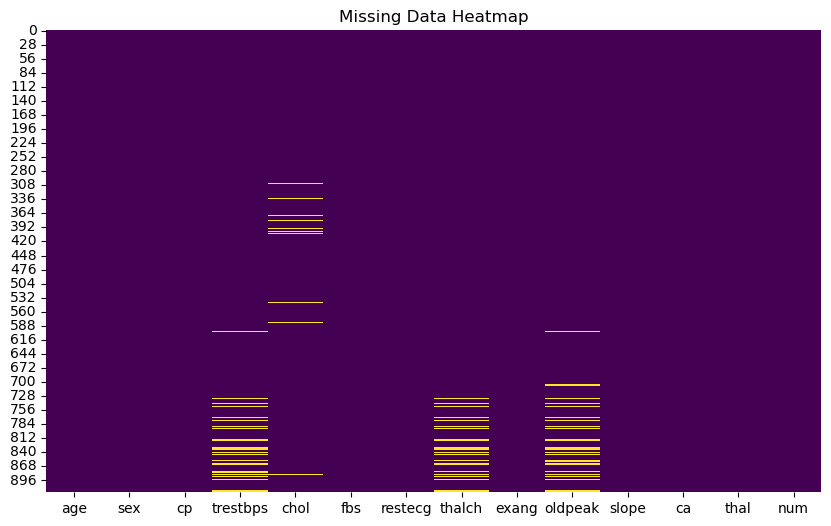

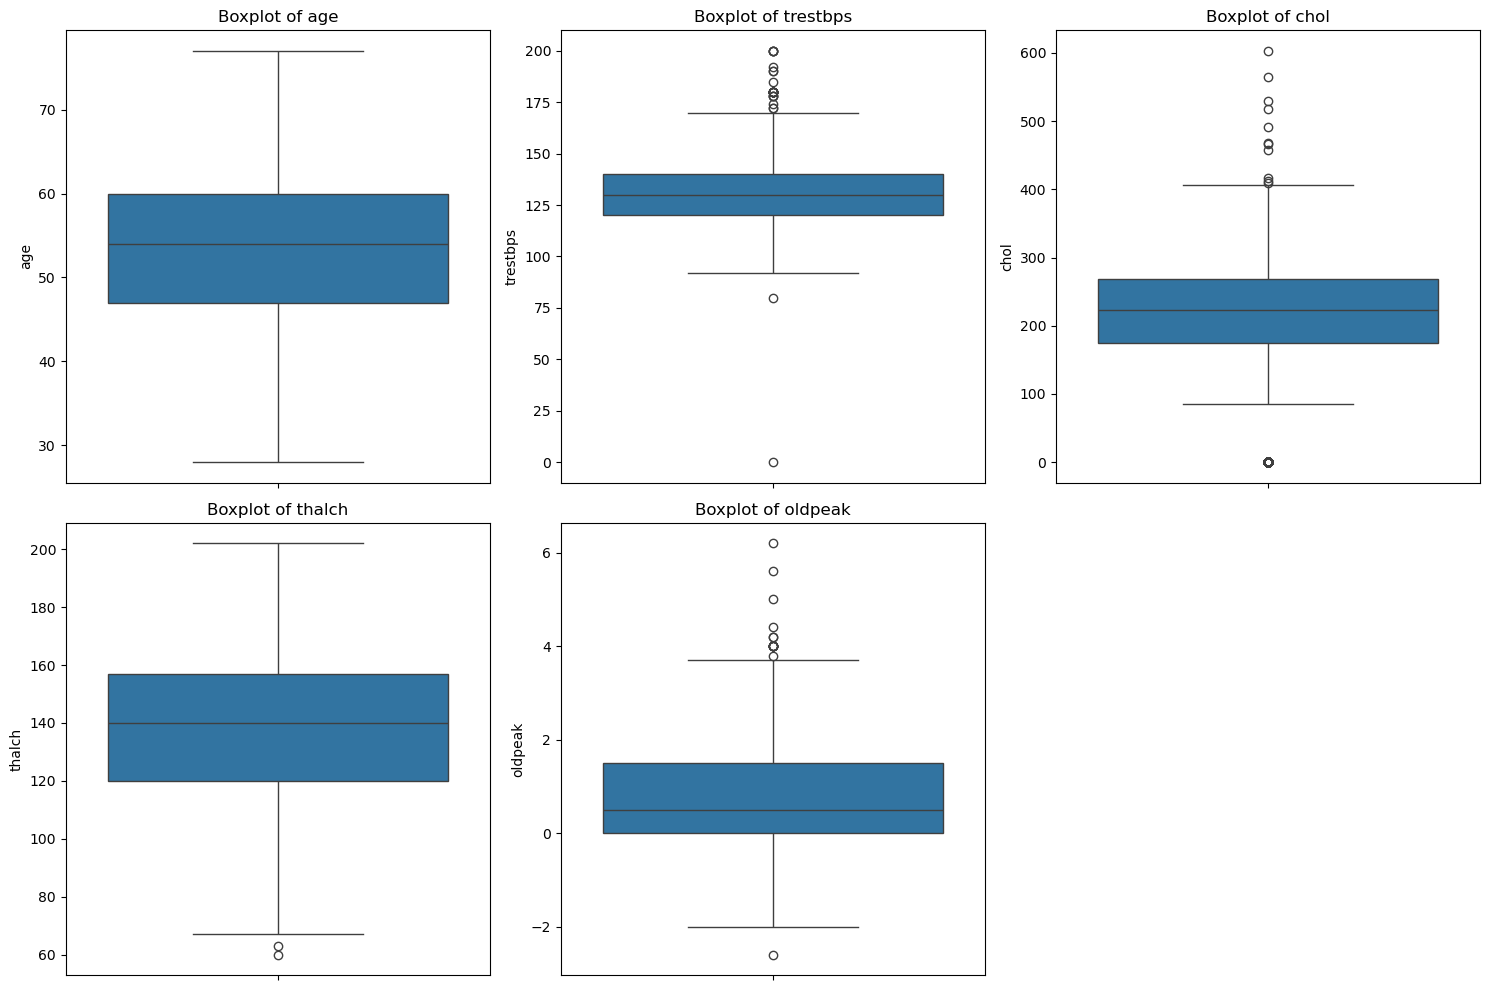

Missing values in each column:
age          0
sex          0
cp           0
trestbps    59
chol        30
fbs          0
restecg      0
thalch      55
exang        0
oldpeak     62
slope        0
ca           0
thal         0
num          0
dtype: int64


C:\Users\mbuto\AppData\Local\Temp\ipykernel_37512\703392592.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\mbuto\AppData\Local\Temp\ipykernel_37512\703392592.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

KeyError: 'dataset'

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
missing_values = df.isnull().sum()

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# Check for outliers using boxplots
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

# Print missing values summary
print("Missing values in each column:")
print(missing_values)

# Strategy for handling missing data and outliers
# - Impute missing values using median for numerical features
# - Use mode for categorical features
# - Consider removing or transforming outliers

# Impute missing values
for column in numerical_features:
    df[column].fillna(df[column].median(), inplace=True)

for column in categorical_features:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Recheck missing values
missing_values_after = df.isnull().sum()
print("\
Missing values after imputation:")
print(missing_values_after)

6. **Data Splitting:**
   -Split the dataset into training, validation, and test sets while maintaining class distribution and analyzes feature distributions across different groups.
   - bias mitigation analysis with age groups and additional features

7. **Bias Mitigation:**
   - Ensure fairness and equity in data representation.
   
    **Your answer for Hypothesis Testing goes here **



In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Prepare features and target
X = df.drop(['num', 'id', 'dataset'], axis=1)
y = df['num']

# First split: separate test set
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Second split: separate validation set from remaining data
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

# Check class distribution in all sets
print("Class distribution:")
print("Training set:", np.bincount(y_train) / len(y_train))
print("Validation set:", np.bincount(y_val) / len(y_val))
print("Test set:", np.bincount(y_test) / len(y_test))

# Analyze potential biases
print("\
Feature distributions across different groups:")
for col in ['sex', 'age']:
    print(f"\
Distribution by {col}:")
    print(df.groupby(col)['num'].value_counts(normalize=True).unstack())

KeyError: "['id', 'dataset'] not found in axis"

In [ ]:
import pandas as pd

# Create age groups
df['age_group'] = pd.cut(df['age'], bins=[0, 40, 55, 70, 100], labels=['<40', '40-55', '55-70', '>70'])

# Analyze bias across multiple dimensions
bias_analysis = pd.DataFrame({
    'Total_Count': df.groupby(['age_group', 'sex'])['num'].count(),
    'Disease_Rate': df.groupby(['age_group', 'sex'])['num'].apply(lambda x: (x > 0).mean())
})

print("Bias Analysis across Age Groups and Gender:")
print(bias_analysis)

# Calculate statistical parity
print("\
Statistical Parity (Disease Rate) by Gender:")
print(df.groupby('sex')['num'].apply(lambda x: (x > 0).mean()))

Bias Analysis across Age Groups and Gender:
               Total_Count  Disease_Rate
age_group sex                           
<40       0             20      0.200000
          1             73      0.383562
40-55     0            103      0.145631
          1            317      0.548896
55-70     0             65      0.461538
          1            318      0.761006
>70       0              6      0.166667
          1             18      0.833333
Statistical Parity (Disease Rate) by Gender:
sex
0    0.257732
1    0.632231
Name: num, dtype: float64


<ipython-input-18-5caa8efd5ec9>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  'Total_Count': df.groupby(['age_group', 'sex'])['num'].count(),
<ipython-input-18-5caa8efd5ec9>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  'Disease_Rate': df.groupby(['age_group', 'sex'])['num'].apply(lambda x: (x > 0).mean())


8. **Features for Model Training:**
   - To identify relevant features for model training and rank them based on significance, I'll perform feature importance analysis using a Random Forest model. This will help visualize the importance of each feature. Then, I'll classify the data types and plan preprocessing steps accordingly. Let's proceed with the feature importance analysis.

 **Your answer for features must be plotted/ show your working code-wise **
9. **Types of Data Handling:**
   - Classify the types of data (categorical, numerical, etc.) present in the dataset.
   - Plan preprocessing steps for each data type.

   [**insert text for preprocessing steps**]


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Read the data
df = pd.read_csv('heart.csv')

# Identify data types
print("Data Types in Dataset:")
print(df.dtypes)

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("\
Numerical Columns:")
print(numerical_cols)
print("\
Categorical Columns:")
print(categorical_cols)

# Basic statistics for numerical columns
print("\
Numerical Features Statistics:")
print(df[numerical_cols].describe())

Data Types in Dataset:
id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object
Numerical Columns:
Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num'], dtype='object')
Categorical Columns:
Index(['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')
Numerical Features Statistics:
               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000

In [ ]:
# Check for missing values
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [ ]:
# Impute missing values
# For numerical columns, use mean
for column in ['trestbps', 'chol', 'thalch', 'oldpeak']:
    df[column].fillna(df[column].mean(), inplace=True)

# For 'ca', which is categorical, use mode
mode_value = df['ca'].mode()[0]
df['ca'].fillna(mode_value, inplace=True)

# Verify that there are no more missing values
df.isnull().sum()

<ipython-input-29-853a53c192b2>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
<ipython-input-29-853a53c192b2>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,90
restecg,2
thalch,0


In [ ]:
print(df['age'].dtype)  # Assuming 'age' is the column

float64


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
for column in X.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Re-split the data with encoded features
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

# Fit the RandomForest model again
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for Model Training')
plt.show()

# Print feature importance
print("Feature Importance:")
print(feature_importance_df)

ValueError: could not convert string to float: '<40'

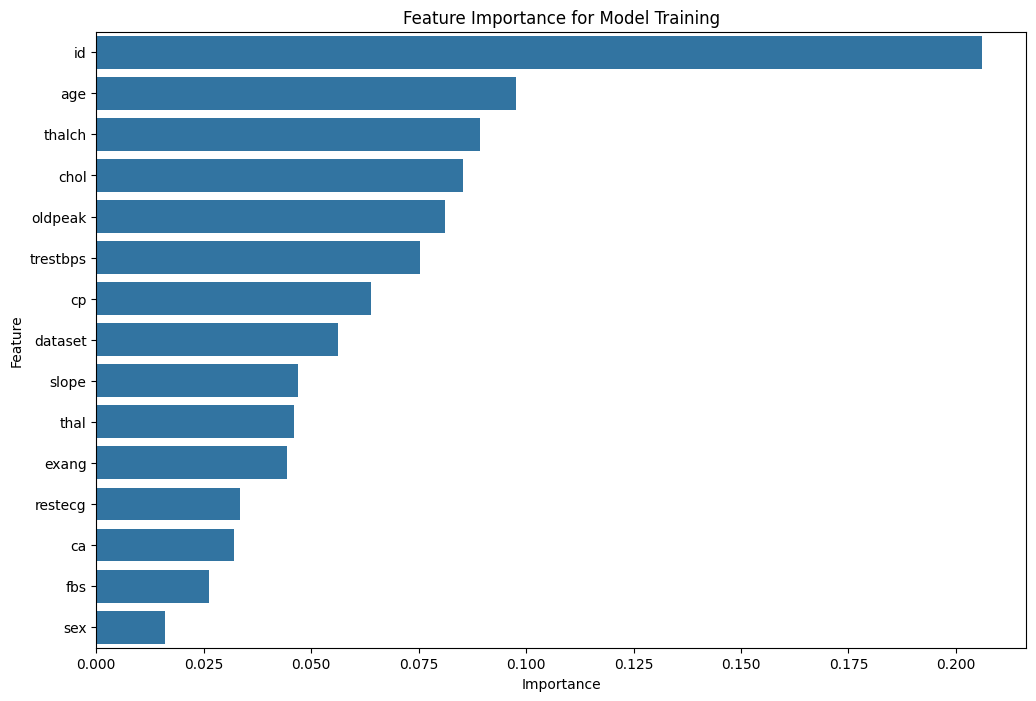

Feature Importance:
     Feature  Importance
0         id    0.206062
1        age    0.097751
9     thalch    0.089207
6       chol    0.085402
11   oldpeak    0.081234
5   trestbps    0.075393
4         cp    0.063964
3    dataset    0.056294
12     slope    0.046891
14      thal    0.045974
10     exang    0.044311
8    restecg    0.033354
13        ca    0.031932
7        fbs    0.026215
2        sex    0.016016


In [ ]:
# Encode categorical variables
for column in categorical_cols:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

# Define features and target
X = df.drop(columns=['num'])
y = df['num']

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Fit the RandomForest model
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for Model Training')
plt.show()

# Print feature importance
print("Feature Importance:")
print(feature_importance_df)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib

# Read original data
df = pd.read_csv('heart.csv')

# Separate features
categorical_features = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

# Create transformers
scaler = StandardScaler()
label_encoders = {col: LabelEncoder() for col in categorical_features}

# Transform numerical features
df_transformed = df.copy()
df_transformed[numerical_features] = scaler.fit_transform(df[numerical_features])

# Transform categorical features
for col in categorical_features:
    df_transformed[col] = label_encoders[col].fit_transform(df[col])

# Save transformers and transformed data
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(label_encoders, 'label_encoders.joblib')
df_transformed.to_csv('heart_transformed.csv', index=False)

print("Transformed Data Preview:")
print(df_transformed.head())
print("\
Transformed Data Shape:", df_transformed.shape)
print("\
Files saved: scaler.joblib, label_encoders.joblib, heart_transformed.csv")

Transformed Data Preview:
   id       age  sex  dataset  cp  trestbps      chol  fbs  restecg    thalch  \
0   1  1.007386    1        0   3  0.675287  0.305908    1        0  0.480653   
1   2  1.432034    1        0   0  1.462483  0.784599    0        0 -1.140262   
2   3  1.432034    1        0   0 -0.636705  0.269780    0        0 -0.329805   
3   4 -1.752828    1        0   2 -0.111908  0.459450    0        1  1.908602   
4   5 -1.328180    0        0   1 -0.111908  0.043982    0        0  1.329704   

   exang   oldpeak  slope        ca  thal  num  
0      0  1.303159      0 -0.724064     0    0  
1      1  0.569611      1  2.487454     1    2  
2      1  1.578239      1  1.416948     2    1  
3      0  2.403480      0 -0.724064     1    0  
4      0  0.477918      2 -0.724064     1    0  
Transformed Data Shape: (920, 16)
Files saved: scaler.joblib, label_encoders.joblib, heart_transformed.csv



10. **Data Transformation for Modeling:**
    - Standardized numerical features (age, trestbps, chol, etc.)
    - Encoded categorical variables (sex, cp, dataset, etc.)

11. **Data Storage:**
    - Saved transformed dataset: 'heart_transformed.csv'
    - Stored transformers: 'scaler.joblib' and 'label_encoders.joblib'
Final shape: (920, 16)

---

#### Notes:
- This template provides a structured framework for documenting your data processing approach for the portfolio project.
- Fill out each section with specific details relevant to your project's requirements and objectives.
- Use additional cells as needed to provide comprehensive information.